## SOLVING THE 1D DIFFUSION EQUATION WITH PLOT ANIMATION

In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [90]:

nx = 41  
L = 2.0  
dx = L / (nx - 1)  
nu = 0.3  
sigma = 0.2
dt = sigma * dx**2 / nu  
nt = 20  

x = numpy.linspace(0.0, L, num=nx)

u0 = numpy.ones(nx)
mask = numpy.where((x >= 0.5) & (x <= 1.0))
u0[mask] = 2.0

In [91]:

u = u0.copy()
for n in range(nt):
    un = u.copy()
    for i in range(1, nx - 1):
        u[i] = un[i] + sigma * (un[ i - 1] - 2 * un[i] + un [i + 1])
#    u[0] = 1.0
#    u[-1] = 1.0

u_naive = u

In [92]:
u = u0.copy()
for n in range(nt):
    un = u.copy()
    u[1:-1] = un[1:-1] + sigma * (un[:-2] - 2 * un[1:-1] + un[2:])

numpy.allclose(u_naive, u)

True

In [93]:
def diffusion(u0, sigma = 0.5, nt=20):
    u_hist = [u0.copy()]
    u = u0.copy()
    for n in range(nt):
        un = u.copy()
        u[1:-1] = un[1:-1] + sigma * (un[:-2] - 2 * un[1:-1] + un[2:])
        u_hist.append(u.copy())
        
    return u_hist

In [94]:
u_hist = diffusion(u0, sigma = sigma, nt = nt)

In [95]:
len(u_hist)

21

In [96]:
def plot_solution(n, u_hist, x):
    pyplot.figure(figsize=(6.0, 4.0))
    pyplot.xlabel('x')
    pyplot.ylabel('u')
    pyplot.grid()
    pyplot.plot(x, u_hist[0], label='Initial', color='C4', linestyle='--', linewidth=2)
    pyplot.plot(x, u_hist[n], label='nt = {}'.format(nt), color='C1', linestyle='-', linewidth=2)
    pyplot.legend(loc='upper right')
    pyplot.xlim(0.0, L)
    pyplot.ylim(0.5, 2.5)
    pyplot.show()

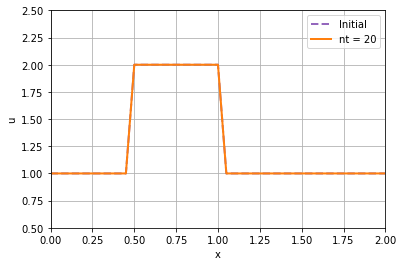

In [97]:
plot_solution(0, u_hist, x)

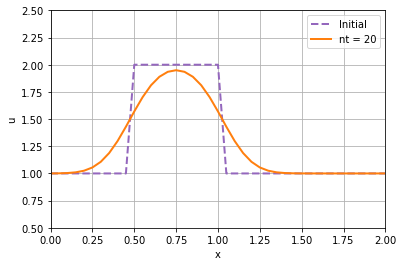

In [98]:
plot_solution(-1, u_hist, x)

## ANIMATIONS WITH PYTHON PLOTS

In [99]:
import ipywidgets

In [100]:
nt_slider = ipywidgets.IntSlider(value=0, min=0, max=nt, step=1, description='Time Step')
w = ipywidgets.interactive(plot_solution, n=nt_slider, u_hist=ipywidgets.fixed(u_hist), x = ipywidgets.fixed(x))

In [102]:
display(w)

interactive(children=(IntSlider(value=20, description='Time Step', max=20), Output(outputs=({'output_type': 'd…

In [103]:
def update_plot(n, u_hist):
    
    fig.suptitle('Time step {:0>2}'.format(n))
    line.set_ydata(u_hist[n])

In [104]:
anim = animation.FuncAnimation(fig, update_plot, frames=nt, fargs=(u_hist,), interval=100)

In [105]:
HTML(anim.to_html5_video())